# Data preparation

Team: HáLab

Team members: Stumphauser Nóra, Lestyan Bence, Módos Dávid

Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import file to pandas dataframe, and drop Loud Cover column, because it contains only 0-s.

In [2]:
data = pd.read_excel("weather_data.xlsx")
data = data.drop(['Loud Cover'], axis=1)
data

,Date,Hour,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),label
0,2006-04-01,00:00:00.000,1,1,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0
1,2006-04-01,01:00:00.000,1,1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0
2,2006-04-01,02:00:00.000,2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,0
3,2006-04-01,03:00:00.000,1,1,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,0
4,2006-04-01,04:00:00.000,2,1,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,19:00:00.000,1,1,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,0
96449,2016-09-09,20:00:00.000,1,1,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,0
96450,2016-09-09,21:00:00.000,1,1,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,0
96451,2016-09-09,22:00:00.000,1,1,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,0


The number of rows:

In [3]:
len(data)

96453

We realize that there are some days, where the data contains 21, 23 or 25 rows. In this case we decided to delete these days for those where there isn't 24 rows, and we delete the duplicates where there are 25 rows. In the last case in all appearaces were at the 2:00 hour, so we delete one of them.

In [4]:
n = 1
miss = 0
miss_num = 0
for i in range(1,len(data)):
    if data['Date'][i] == data['Date'][i-1]:
        n += 1
    else:
        if n != 24:
            print("Error: ", n, " at number : ", i, "day: ", data['Date'][i-1])
            miss += n
            miss_num += 1
        n = 1
print(miss, miss_num)

Error:  23  at number :  5543 day:  2006-03-26 00:00:00
Error:  25  at number :  7824 day:  2006-10-29 00:00:00
Error:  23  at number :  14303 day:  2007-03-25 00:00:00
Error:  25  at number :  16584 day:  2007-10-28 00:00:00
Error:  23  at number :  23231 day:  2008-03-30 00:00:00
Error:  25  at number :  25320 day:  2008-10-26 00:00:00
Error:  23  at number :  31943 day:  2009-03-29 00:00:00
Error:  25  at number :  34056 day:  2009-10-25 00:00:00
Error:  23  at number :  40679 day:  2010-03-28 00:00:00
Error:  25  at number :  42984 day:  2010-10-31 00:00:00
Error:  23  at number :  49415 day:  2011-03-27 00:00:00
Error:  25  at number :  51720 day:  2011-10-30 00:00:00
Error:  23  at number :  58151 day:  2012-03-25 00:00:00
Error:  25  at number :  60432 day:  2012-10-28 00:00:00
Error:  23  at number :  67079 day:  2013-03-31 00:00:00
Error:  25  at number :  69168 day:  2013-10-27 00:00:00
Error:  21  at number :  73917 day:  2014-07-14 00:00:00
Error:  23  at number :  75812 da

In [5]:
data = data.drop(7801)
data = data.drop(16561)
data = data.drop(25297)
data = data.drop(34033)
data = data.drop(42961)
data = data.drop(51697)
data = data.drop(60409)
data = data.drop(69145)
data = data.drop(77878)
data = data.drop(86614)
data = data.drop(95542)

In [6]:
data = data[data.Date != '2006-03-26']
data = data[data.Date != '2007-03-25']
data = data[data.Date != '2008-03-30']
data = data[data.Date != '2009-03-29']
data = data[data.Date != '2010-03-28']
data = data[data.Date != '2011-03-27']
data = data[data.Date != '2011-09-12']
data = data[data.Date != '2012-03-25']
data = data[data.Date != '2013-03-31']
data = data[data.Date != '2014-07-14']
data = data[data.Date != '2014-03-30']
data = data[data.Date != '2015-03-29']
data = data[data.Date != '2016-03-27']
data = data[data.Date != '2010-08-02']

In [7]:
data = data.reset_index(drop=True)

We check again if there is still wrong row.

In [8]:
n = 1
miss = 0
miss_num = 0
for i in range(1,len(data)):
    if data['Date'][i] == data['Date'][i-1]:
        n += 1
    else:
        if n != 24:
            print("Error: ", n, " at number: ", i, "day: ", ido['Date'][i-1])
            miss += n
            miss_num += 1
        n = 1
print(miss_num, miss)

0 0


We create binary label from the Temperature value. We decided to divide the data into two groups, one day got label 1 if the mean of temperature is higher than 12,25 on that day, else it is 0. This case we got balanced data.

Number of days with label 1: 2002

Number of days with label 0: 2002

In [9]:
data.groupby('Date')['Temperature (C)'].mean().median()

12.252546296296256

In [10]:
import numpy as np
days = []
for i in data.groupby('Date')['Temperature (C)'].mean():
    if i > 12.25:
        days.append(1)
    else:
        days.append(0)
print(days.count(1), days.count(0))

2002 2002


For later usage we create label.csv file, which contains each day with its label.

In [11]:
date = data.Date.unique()
df2 = pd.DataFrame({'date':date, 'label':days})
df2.to_csv('label.csv')

In this step we realize that there is a day that is twice in the data, so we find the serial number of it, and we delete that date also above. 

In [12]:
k=1
for i in data.groupby('Date')['Temperature (C)'].count():
    if i != 24:
        print(i,k)
    k+=1

For prediction and for the neural networks we should drop the columns which contains information about temperature. If we left these in the data the neural networks could easily learn them. Our goal is to find difference between simple classifiers and neural networks so we save the data into another csv which would be the base of the classifiers.

In [13]:
data = data.drop(['Temperature (C)'], axis=1)
data = data.drop(['Apparent Temperature (C)'], axis=1)
col = data.columns[2:9]
data.to_csv('data_clf.csv')

For creating images we should convert each value in each column to 0-255. For this we use min-max scaling, and multiply it by 255.

In [14]:
for j in col:
    print(j)
    mini = np.min(data[j])
    maxi = np.max(data[j])
    for i in range(len(data)):   
        data[j][i] = (data[j][i]-mini)/(maxi-mini)*255   

Summary


<ipython-input-14-13a238355a5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j][i] = (data[j][i]-mini)/(maxi-mini)*255


Precip Type
Humidity
Wind Speed (km/h)
Wind Bearing (degrees)
Visibility (km)
Pressure (millibars)


Number of images is equal to number of days:

In [15]:
data['Date'].nunique()

4004

We create a 3D-array, each image is 7x24 and we have 4004 images. We go through the data, and until it is the same day we put the rows into the day's numpy array.

In [16]:
zero = np.zeros([4004,7,24])
d = 0
k = 0
for i in range(1,len(data)):
    if data['Date'][i] == data['Date'][i-1]:
        zero[d,:,k] = np.array(data.iloc[i-1,2:9])
        k+=1
    else:
        zero[d,:,k] = np.array(data.iloc[i-1,2:9])
        k = 0
        d+=1
        if d %1000 == 0:
            print(d)

1000
2000
3000
4000


Here is an example of the created images:

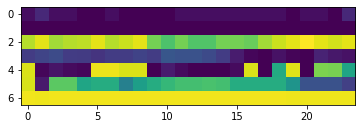

In [17]:
plt.imshow(zero[1155,:,:])

In [18]:
len(zero)

4004

We use the above label.csv file, it was copied from another notebook, that's why it is again a csv loading.

In [19]:
label = pd.read_csv('label.csv')
label = label.drop(label.columns[0], axis = 1)

Creating train, valid and test sets:

We make 70% train set, 15% validation set and 15% test set.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(zero, label['label'], test_size=0.30, random_state=42)

In [22]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

In [23]:
print(len(x_train), len(x_valid), len(x_test))

2802 601 601


In [24]:
print(len(y_train), len(y_valid), len(y_test))

2802 601 601


In [25]:
x_train.shape

(2802, 7, 24)

In [26]:
y_train.shape

(2802,)

In [27]:
np.save('images.npy', zero)